In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Modelling

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import csv data as pandas dataframe

In [3]:
df=pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### preparing x and y variables

In [4]:
x=df.drop(columns=['math score'],axis=1)
y=df['math score']

#### Create column transformers with 3 types of transformers

In [5]:
num_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_trandsformer=OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHorEncoder', oh_trandsformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ])

In [6]:
x=preprocessor.fit_transform(x)

* Separate dataset into train and test data

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

* Create an Evaluation function to give all metrices after model training

In [8]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    r2=r2_score(true,predicted)
    rmse=np.sqrt(mse)
    return mae,rmse,mse,r2

In [13]:
models={
    "Linear Regression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "DecisionTree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=0),
    "AdaBoost Regressor":AdaBoostRegressor(),
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)      ## train thr model

    ## Make the prediction
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    ## Evaluate the train and test model
    mae_train,rmse_train,mse_train,r2_train=evaluate_model(y_train,y_train_pred)
    mae_test,rmse_test,mse_test,r2_test=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for training set")
    print("------------------------------------")
    print("- Mean Absolute Error : {:.4f}".format(mae_train))
    print("- Mean Squared Error : {:.4f}".format(mse_train))
    print("- Root Mean Squared Error : {:.4f}".format(rmse_train))
    print("- R2 Score : {:.4f}".format(r2_train))

    print("------------------------------------")
    print("Model performance for testing set")
    print("Mean Absolute Error : {:.4f}".format(mae_test))
    print("Mean Squared Error : {:.4f}".format(mse_test))
    print("Root Mean Squared Error : {:.4f}".format(rmse_test))
    print("R2 Score : {:.4f}".format(r2_test))
    print("=========================================")

    r2_list.append(r2_test)

Linear Regression
Model performance for training set
------------------------------------
- Mean Absolute Error : 4.2685
- Mean Squared Error : 28.3609
- Root Mean Squared Error : 5.3255
- R2 Score : 0.8742
------------------------------------
Model performance for testing set
Mean Absolute Error : 4.2184
Mean Squared Error : 29.1696
Root Mean Squared Error : 5.4009
R2 Score : 0.8801
Ridge
Model performance for training set
------------------------------------
- Mean Absolute Error : 4.2650
- Mean Squared Error : 28.3378
- Root Mean Squared Error : 5.3233
- R2 Score : 0.8743
------------------------------------
Model performance for testing set
Mean Absolute Error : 4.2111
Mean Squared Error : 29.0563
Root Mean Squared Error : 5.3904
R2 Score : 0.8806
Lasso
Model performance for training set
------------------------------------
- Mean Absolute Error : 5.2063
- Mean Squared Error : 43.4784
- Root Mean Squared Error : 6.5938
- R2 Score : 0.8071
------------------------------------
Model 

In [14]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name','R2 Score']).sort_values(by='R2 Score',ascending=False)

,Model name,R2 Score
1,Ridge,0.880593
0,Linear Regression,0.880127
5,Random Forest Regressor,0.853870
8,AdaBoost Regressor,0.851944
7,CatBoosting Regressor,0.851632
6,XGBRegressor,0.827797
2,Lasso,0.825320
3,K-Neighbors Regressor,0.783497
4,DecisionTree,0.735615


### Linear regression

In [15]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 0.88


Plot y_pred and y_test

Text(0, 0.5, 'Predicted values')

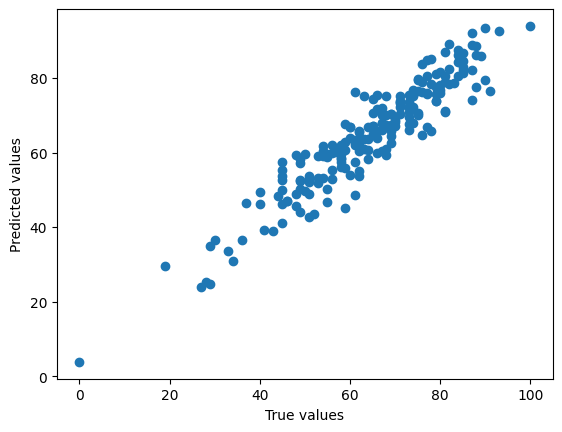

In [16]:
plt.scatter(y_test,y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')

<Axes: xlabel='math score'>

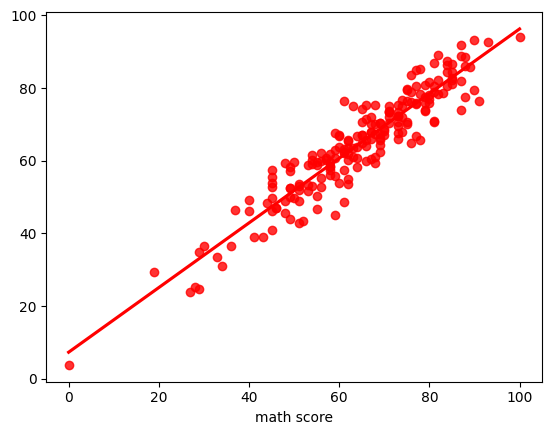

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

### Difference between actual values and the predcited values

In [19]:
pred_df=pd.DataFrame({'True values':y_test,'Predicted values':y_pred,'Difference':y_test-y_pred})
pred_df

,True values,Predicted values,Difference
521,91,76.513672,14.486328
737,53,58.976562,-5.976562
740,80,76.884766,3.115234
660,74,76.710938,-2.710938
411,84,87.521484,-3.521484
...,...,...,...
408,52,43.564453,8.435547
332,62,61.994141,0.005859
208,74,68.009766,5.990234
613,65,67.134766,-2.134766
